In [ ]:
import numpy as np
#data procceing and reading the data
import pandas as pd
#data vusuazaltion
import matplotlib.pyplot as plt
#create accuracy and diagrams
import seaborn as sns
#split the data
from sklearn.model_selection import train_test_split
#standrdation the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#reggrition model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
data=pd.read_csv('/content/featured_Spotify_track_info.csv')
data.head()

,ids,names,popularity,markets,artists,release_date,duration_ms,acousticness,danceability,energy,...,loudness,speechiness,tempo,valence,musicalkey,musicalmode,time_signature,count,dates,playlists_found
0,7lznzPjPyRFdcYaD9gN7a3,This Is Shangrila,45.0,152.0,3XR64HmFo4OvexUUNW7TP0,1990-01-01,220706.0,0.004280,0.467,0.774,...,-10.617,0.0515,109.529,0.324,4.0,0.0,4.0,1.0,2024-04-01,Grunge Forever
1,3e2fDgC93LGc9Lbdvr6I9k,River Of Deceit,52.0,185.0,0T7JQxpy1Li93vLNirbv0Z,1995-03-07,302693.0,0.111000,0.461,0.246,...,-13.487,0.0298,88.446,0.178,0.0,1.0,4.0,1.0,2024-04-01,Grunge Forever
2,0donjzZGsCA2PfPUA4EdMN,Shadow of the Season,46.0,185.0,3Ukr3Ufjg8ygRJv7Ww887f,1992,273813.0,0.000046,0.163,0.937,...,-5.502,0.0882,184.482,0.413,0.0,1.0,4.0,1.0,2024-04-01,Grunge Forever
3,3bE5slaVEfaDreqARl6k4M,Yellow Ledbetter,69.0,183.0,1w5Kfo2jwwIPruYS2UWh56,1991,303586.0,0.290000,0.504,0.354,...,-11.300,0.0339,140.870,0.292,4.0,1.0,4.0,1.0,2024-04-01,Grunge Forever
4,1LvJ1PFobtIm5DwzRrK0jG,Swallow My Pride,43.0,185.0,1XIIxzmo6BNRR4QkImSdsX,1990-09-13,179800.0,0.423000,0.349,0.869,...,-11.481,0.0934,127.440,0.193,4.0,1.0,4.0,1.0,2024-04-01,Grunge Forever


In [ ]:
#find the  null values
data.isnull().sum()

ids                  0
names                0
popularity           0
markets              0
artists              0
release_date         0
duration_ms          0
acousticness        14
danceability        14
energy              14
instrumentalness    14
liveness            14
loudness            14
speechiness         14
tempo               14
valence             14
musicalkey          14
musicalmode         14
time_signature      14
count                0
dates                0
playlists_found      0
dtype: int64

In [ ]:
#fill the null values in to data set
data['acousticness'].fillna(data['acousticness'].median(),inplace=True)
data['instrumentalness'].fillna(data['instrumentalness'].median(),inplace=True)
data['liveness'].fillna(data['liveness'].median(),inplace=True)
data['loudness'].fillna(data['loudness'].median(),inplace=True)
data['tempo'].fillna(data['tempo'].median(),inplace=True)
data['valence'].fillna(data['valence'].median(),inplace=True)
data['speechiness'].fillna(data['speechiness'].median(),inplace=True)
data['musicalkey'].fillna(data['musicalkey'].median(),inplace=True)
data['musicalmode'].fillna(data['musicalmode'].median(),inplace=True)
data['energy'].fillna(data['energy'].median(),inplace=True)
data['danceability'].fillna(data['danceability'].median(),inplace=True)
data['time_signature'].fillna(data['time_signature'].median(),inplace=True)
data.isnull().sum()

ids                 0
names               0
popularity          0
markets             0
artists             0
release_date        0
duration_ms         0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
musicalkey          0
musicalmode         0
time_signature      0
count               0
dates               0
playlists_found     0
dtype: int64

In [ ]:
data.isnull().sum()

ids                  0
names                0
popularity           0
markets              0
artists              0
release_date         0
duration_ms          0
acousticness        14
danceability        14
energy              14
instrumentalness    14
liveness            14
loudness            14
speechiness         14
tempo               14
valence             14
musicalkey          14
musicalmode         14
time_signature      14
count                0
dates                0
playlists_found      0
dtype: int64

In [ ]:
sns.pairplot(data)

In [ ]:
# df.corr()
num_df=data.select_dtypes(include=[np.number])
cat_df=data.select_dtypes(exclude=[np.number])
num_df.corr()

,popularity,markets,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,musicalkey,musicalmode,time_signature,count
popularity,1.000000,0.272927,-0.041191,-0.124909,0.143435,0.097388,-0.135428,-0.000470,0.079828,0.039692,0.014237,0.110201,0.003573,-0.028349,0.015732,0.172699
markets,0.272927,1.000000,-0.105204,0.048714,-0.023395,-0.056785,0.112378,-0.018936,-0.085040,0.028438,-0.013713,-0.050876,-0.005664,-0.000055,-0.010170,0.040790
duration_ms,-0.041191,-0.105204,1.000000,-0.106221,-0.069838,0.128352,-0.138836,-0.002681,0.153126,-0.112551,0.027666,-0.051031,0.001263,-0.015035,0.017672,-0.112307
acousticness,-0.124909,0.048714,-0.106221,1.000000,-0.482377,-0.858896,0.547844,-0.236583,-0.751274,-0.209617,-0.285654,-0.417974,-0.043416,0.161681,-0.226158,0.042332
danceability,0.143435,-0.023395,-0.069838,-0.482377,1.000000,0.465747,-0.428979,0.053537,0.610760,0.257311,0.065921,0.544211,0.051561,-0.187194,0.223133,0.039295
energy,0.097388,-0.056785,0.128352,-0.858896,0.465747,1.000000,-0.593616,0.278311,0.843591,0.200490,0.320427,0.491503,0.056120,-0.165310,0.234272,-0.047380
instrumentalness,-0.135428,0.112378,-0.138836,0.547844,-0.428979,-0.593616,1.000000,-0.177013,-0.750701,-0.210577,-0.205973,-0.445483,-0.030235,0.071916,-0.175159,0.028254
liveness,-0.000470,-0.018936,-0.002681,-0.236583,0.053537,0.278311,-0.177013,1.000000,0.220355,0.127616,0.091759,0.106245,0.010541,-0.048162,0.060566,-0.017562
loudness,0.079828,-0.085040,0.153126,-0.751274,0.610760,0.843591,-0.750701,0.220355,1.000000,0.189896,0.283570,0.492223,0.059369,-0.156391,0.239141,-0.052899
speechiness,0.039692,0.028438,-0.112551,-0.209617,0.257311,0.200490,-0.210577,0.127616,0.189896,1.000000,0.113694,0.149726,0.030862,-0.125968,0.082127,0.071690


In [ ]:
sns.pairplot(num_df)

In [ ]:
num_df.columns

Index(['popularity', 'markets', 'duration_ms', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'musicalkey', 'musicalmode', 'time_signature',
       'count'],
      dtype='object')

<Axes: >

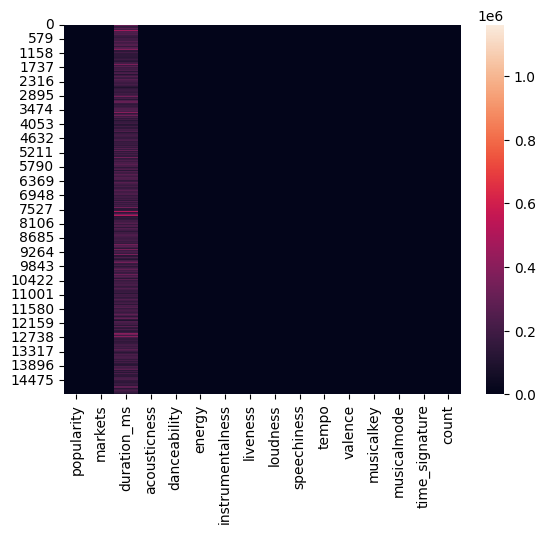

In [ ]:
sns.heatmap(num_df)

<Axes: xlabel='liveness', ylabel='loudness'>

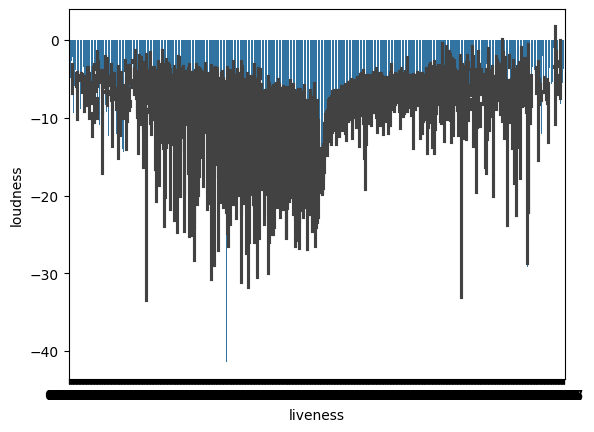

In [ ]:
sns.barplot(x="liveness",y="loudness",data=data)